
# TP CNN


## Introduction

In [ ]:
from IPython.display import Image
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Activation
import matplotlib.pyplot as plt

2.14.0


**The GPU**



To enable GPU backend in Google colab for your notebook:

1.   Runtime (top left corner) -> Change runtime type
2.   Put GPU as "Hardware accelerator"
3.   Save.

Or run the next cell:

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


[link text](https:// [link text](https://))## Convolutional Neural Networks (CNN)

Derived from the MLP, a convolutional neural network (CNN) is a type of artificial neural network that is specifically designed to process **pixel data**.  The layers of a CNN consist of an **input layer**, an **output layer** and **hidden layers** that can include **convolutional layers**, **pooling layers**, **fully connected layers** and **normalization layers**. It exists a lot of techniques to optimize CNN, like for example the dropout.

### Loading the dataset
In this part, we will use photographies of animals from the kaggle dataset [animals-10](https://www.kaggle.com/alessiocorrado99/animals10). Please connect to their site before loading the dataset from this [zip file](http://www.i3s.unice.fr/~lingrand/raw-img.zip). Decompress the zip file on your disk.

If you are using google colab, there is no need to download the dataset because I have a copy on my drive. You just need add to your drive this shared folder: https://drive.google.com/drive/folders/15cB1Ky-7OTUqfcQDZZyzc5HArt0GA6Sm?usp=sharing
You need to click on the link and click on "Add shortcut to Drive" and then select "My Drive".

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


To feed the data to a CNN, we need to shape it as required by Keras. As input, a 2D convolutional layer needs a **4D tensor** with shape: **(batch, rows, cols, channels)**. Therefore, we need to precise the "channels" axis, which can be seen as the number of level of color of each input: 3 channels in our case. We will fix the dimension of images according to the VGG-16 network: (224, 224).


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, MaxPooling2D, Flatten
from sklearn.metrics import confusion_matrix, confusion_matrix, f1_score
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import glob
# when processing time is long, it's nice to see the progress bar
#!pip install tqdm
from tqdm import tqdm

### loading train data

Please read the code before running any of the cells!

In [ ]:
# Set the root directory for the dataset
datasetRoot = '/content/drive/My Drive/raw-img/'
from sklearn.utils import shuffle

# Define the classes for the classification task
classes = ['mucca', 'elefante', 'gatto', 'cavallo']
nbClasses = len(classes)

# Training data directory
rootTrain = datasetRoot + 'train/'

# Initialize variables for data loading and processing
classLabel = 0
totalImg = 200  # Number of images per class to load (reduced for demonstration)
#totalImg = nbClasses * reducedSizePerClass

# Initialize an empty array to store the training data (images)
#xTrain = np.empty(shape=(totalImg, 224, 224, 3))  # 4D tensor with shape (batch, rows, cols, channels)
X = []  # Temporary list to store image arrays
y = []  # Temporary list to store class labels

# Loop through each class
for cl in classes:
    # Get the list of image paths for the current class
    listImages = glob.glob(rootTrain + cl + '/*')

    # Assign labels to the current class (repeated 'reducedSizePerClass' times)
    #y += [classLabel] * reducedSizePerClass

    # Loop through image paths for the current class
    for pathImg in tqdm(listImages[:totalImg]):
        # Load and preprocess each image
        img = image.load_img(pathImg, target_size=(224, 224))
        im = image.img_to_array(img)
        X += [im]  # Append the image array to the temporary list
        # Append the class label to the temporary list
        y += [classLabel]

    # Increment the class label for the next class
    classLabel += 1

print(y)
# Shuffle the training data and labels
xTrain, yTrain = shuffle(np.array(X) / 255., np.array(y).reshape(-1))
#Convert the temporary list y (containing class labels) to a NumPy array and reshape it to a 1D array using .reshape(-1). This ensures that the labels are in a flat, one-dimensional format.
# Print the shape of the training data and labels for verification
print(xTrain.shape, yTrain.shape)
yTrain
 #shuffling the training data and labels before using them to train a machine learning model.

**[TO DO - Students] What is the dimension of xTrain ? What do those dimensions represent ?**
response : we have 2000 samples, each one with 224*224 pixels and each pixels has a value of the 3 RGB colors.


**[TO DO - Students] Complete the following code to plot a few training images**


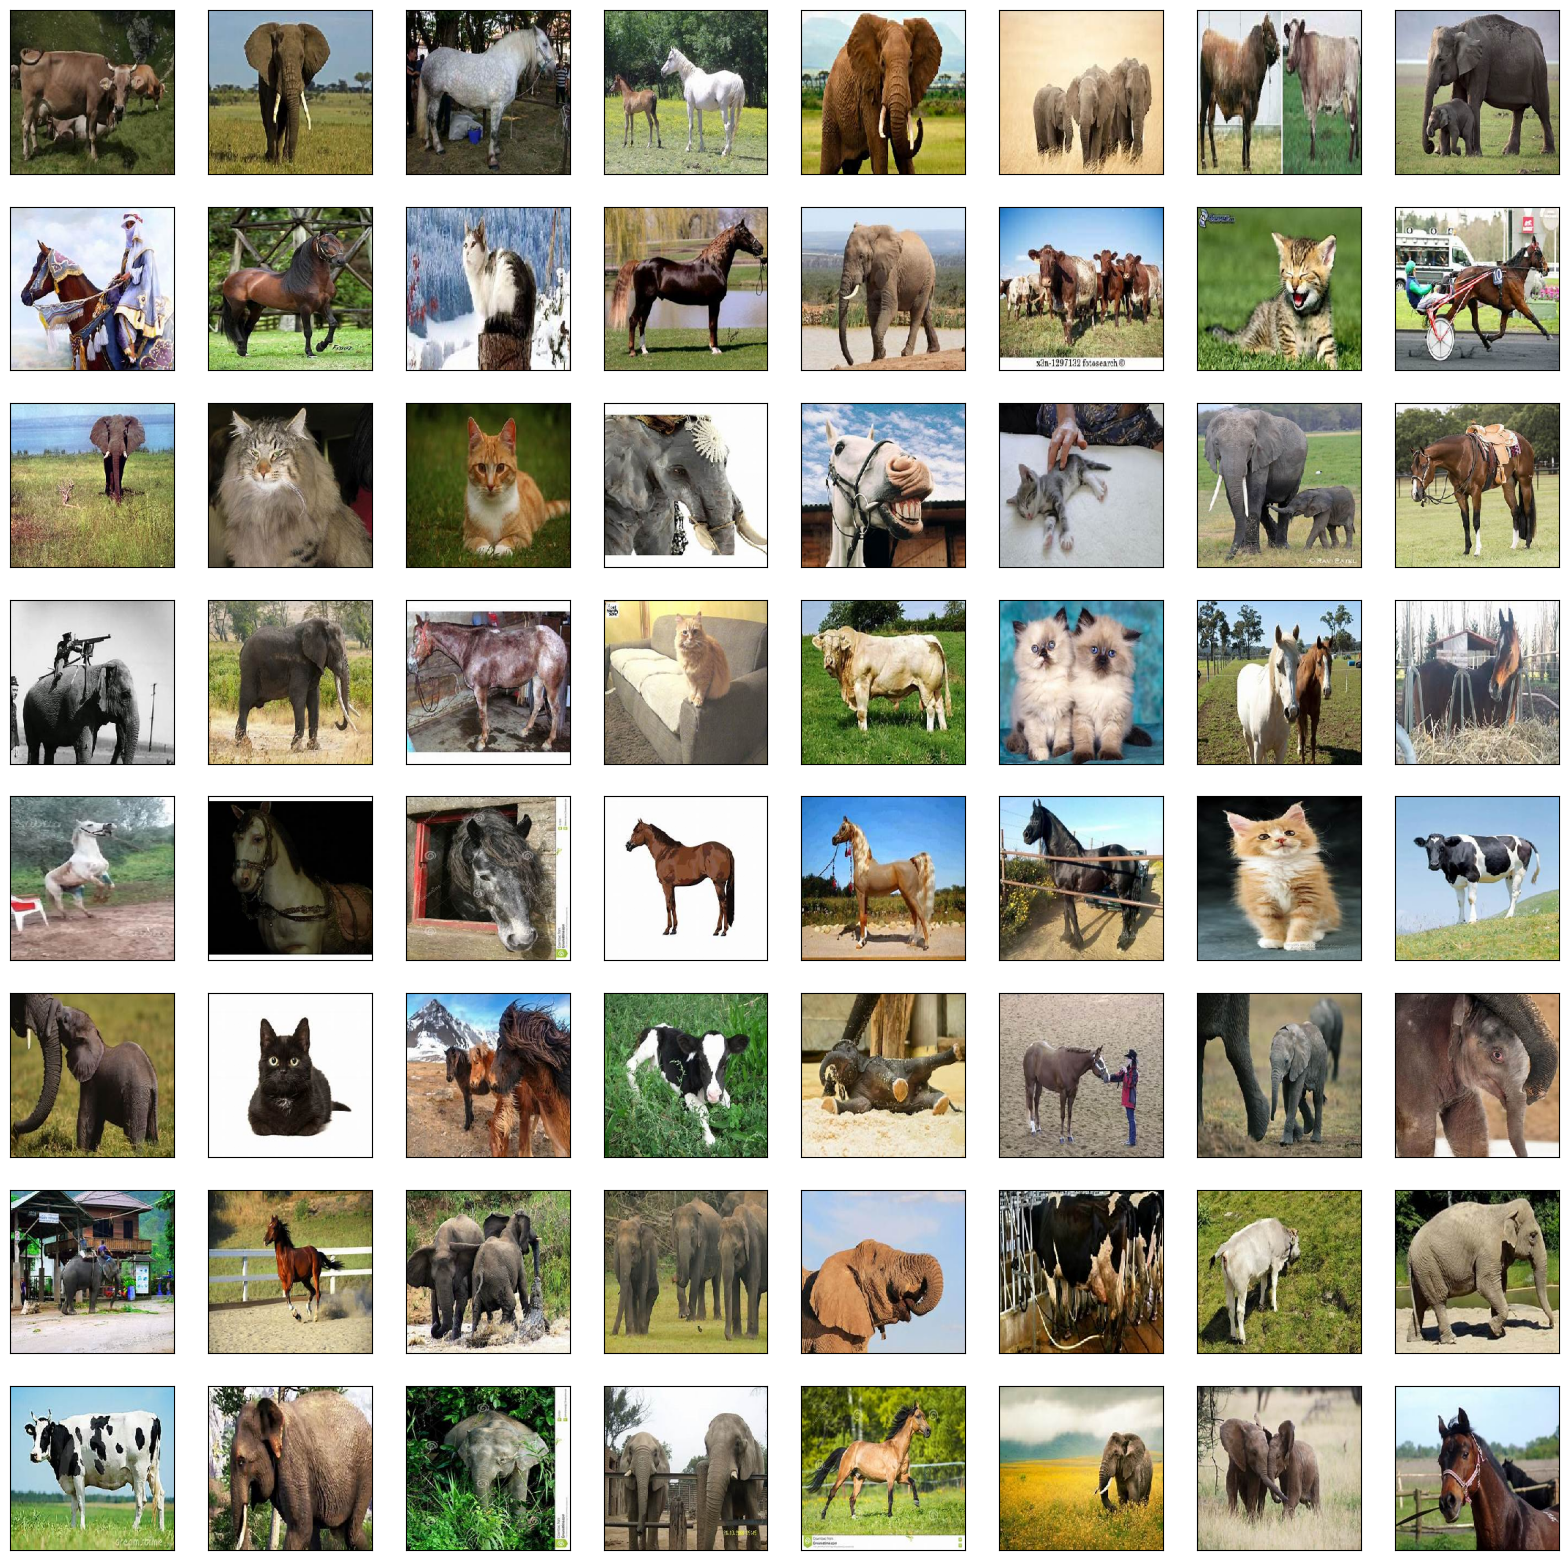

In [ ]:
import matplotlib.pyplot as plt

square = 8
ix = 1
fig, axs = plt.subplots(square, square, figsize=(20, 20))
for i in range(square):
    for j in range(square):
        # specify subplot and turn of axis
        ax = axs[i,j]
        ax.set_xticks([])
        ax.set_yticks([])
        im = xTrain[ix][:,:,...]
        ax.imshow(im)



        ix += 1

In order to speed-up the time spent on this part of the lab, you may have noticed that we reduced the number of classes and the number of images per class. You can change these few lines of code if you want to work on the whole dataset.

### loading test data

In [ ]:
# Set the root directory for the dataset
datasetRoot = '/content/drive/My Drive/raw-img/'

# Define the classes for the classification task
classes = ['mucca', 'elefante', 'gatto', 'cavallo']
nbClasses = len(classes)

# Training data directory
rootTrain = datasetRoot + 'test/'

# Initialize variables for data loading and processing
classLabel = 0
totalImg = 600 # Number of images per class to load (reduced for demonstration)
#totalImg = nbClasses * reducedSizePerClass

# Initialize an empty array to store the training data (images)
#xTrain = np.empty(shape=(totalImg, 224, 224, 3))  # 4D tensor with shape (batch, rows, cols, channels)
X = []  # Temporary list to store image arrays
y = []  # Temporary list to store class labels

# Loop through each class
for cl in classes:
    # Get the list of image paths for the current class
    listImages = glob.glob(rootTrain + cl + '/*')

    # Assign labels to the current class (repeated 'reducedSizePerClass' times)
    #y += [classLabel] * reducedSizePerClass

    # Loop through image paths for the current class
    for pathImg in tqdm(listImages[:totalImg]):
        # Load and preprocess each image
        img = image.load_img(pathImg, target_size=(224, 224))
        im = image.img_to_array(img)

        X += [im]  # Append the image array to the temporary list

        # Append the class label to the temporary list
        y += [classLabel]


    # Increment the class label for the next class
    classLabel += 1

# Shuffle the training data and labels

xTest, yTest = shuffle(np.array(X) / 255., np.array(y).reshape(-1))

#Convert the temporary list y (containing class labels) to a NumPy array and reshape it to a 1D array using .reshape(-1). This ensures that the labels are in a flat, one-dimensional format.
# Print the shape of the training data and labels for verification
print(xTest.shape, yTest.shape)
 #shuffling the training data and labels before using them to train a machine learning model.

100%|██████████| 525/525 [00:06<00:00, 87.06it/s] 


(1516, 224, 224, 3) (1516,)


In [ ]:
from sklearn.model_selection import train_test_split

xTrain, xVal, yTrain, yVal =  train_test_split(xTrain, yTrain, test_size=0.2, shuffle=True, stratify=yTrain)

## Build your own CNN network

**[TO DO - Students] Start with the simplest CNN: 1 conv2D layer + 1 pooling + 1 dense layer. Fill the gaps and explain the parameters of the MaxPooling2D layer**

In [ ]:
from tensorflow.keras.layers import Input# Create a Sequential model
model = Sequential()

# Add an input layer with the shape of the input data (assuming xTrain is a 4D tensor representing images)
model.add(Input(shape=xTrain.shape[1:]))
#padding refers to the additional pixels added to the input
#data around its borders before applying the convolution operation.
# Add a convolutional layer with 16 filters, a 3x3 kernel, 'valid' padding, and ReLU activation
model.add(Conv2D(16, (3, 3), padding='valid', activation='relu'))
# The convolutional layer learns local patterns in the input images.

# Add a max-pooling layer with a 2x2 pool size and 'valid' padding
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
# The max-pooling layer reduces the spatial dimensions, capturing important information.

# Flatten the 2D feature maps to a 1D vector
model.add(Flatten())

# Add a dense layer with 1024 units and ReLU activation
model.add(Dense(1024, activation='relu'))
# The dense layer learns high-level features from the flattened input.

# Add an output layer with nbClasses units and softmax activation for multi-class classification
model.add(Dense(nbClasses, activation='softmax'))
# The softmax activation produces class probabilities.

# Compile the model with the Adam optimizer, sparse categorical crossentropy loss, and accuracy as a metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# The model is ready for training with the specified optimizer, loss function, and evaluation metric.



Let's look at the dimension of all inputs and outputs:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 197136)            0         
                                                                 
 dense (Dense)               (None, 1024)              201868288 
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 201872836 (770.08 MB)
Trainable params: 201872836 (770.08 MB)
Non-trainable params: 0 (0.00 Byte)
__________

**[TO DO - Students] Train and test this network.**

In [ ]:
## Your code here
history= model.fit(xTrain, np.array(yTrain), epochs=100, shuffle=True,
                   batch_size=64, validation_data=(xVal, np.array(yVal)),
                   callbacks=[EarlyStopping(monitor="val_loss", mode="auto", patience=15)])
# Automatically determines the direction of improvement


Epoch 1/100
10/10 [==============================] - 12s 163ms/step - loss: 75.1382 - accuracy: 0.2219 - val_loss: 44.1985 - val_accuracy: 0.2500
Epoch 2/100
10/10 [==============================] - 1s 105ms/step - loss: 20.5993 - accuracy: 0.3516 - val_loss: 10.1593 - val_accuracy: 0.3313
Epoch 3/100
10/10 [==============================] - 1s 107ms/step - loss: 6.8142 - accuracy: 0.3922 - val_loss: 6.0246 - val_accuracy: 0.3000
Epoch 4/100
10/10 [==============================] - 1s 116ms/step - loss: 2.6483 - accuracy: 0.5516 - val_loss: 2.7480 - val_accuracy: 0.4688
Epoch 5/100
10/10 [==============================] - 1s 119ms/step - loss: 1.0731 - accuracy: 0.7125 - val_loss: 2.5561 - val_accuracy: 0.3875
Epoch 6/100
10/10 [==============================] - 1s 116ms/step - loss: 0.4807 - accuracy: 0.8500 - val_loss: 1.6617 - val_accuracy: 0.5000
Epoch 7/100
10/10 [==============================] - 1s 111ms/step - loss: 0.1808 - accuracy: 0.9375 - val_loss: 1.7073 - val_accuracy: 0

**[TO DO - Students] Plot the training metrics (loss and accuracy). Test the model on the test data and compare the confusion matrix on the test data and train data**

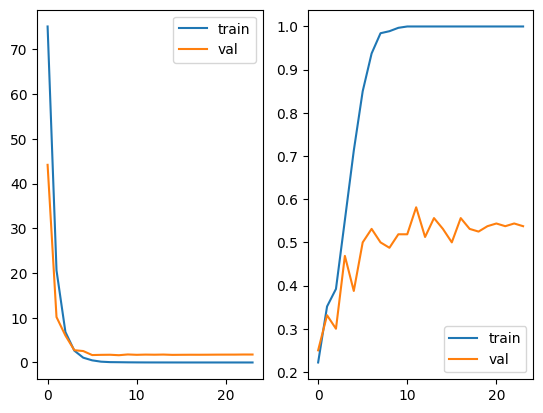

In [ ]:
# Plot history
f, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='val')
ax1.legend()
ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='val')
ax2.legend()
plt.show()

In [ ]:
# for you !
score = model.evaluate(xTest,yTest)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

ypred = np.argmax(model.predict(xTest), axis=1)
print("F1 score: ", f1_score(yTest,ypred,average='micro'))

48/48 [==============================] - 1s 19ms/step - loss: 1.8525 - accuracy: 0.5343
accuracy: 53.43%
48/48 [==============================] - 1s 25ms/step
F1 score:  0.5343007915567283


Visualize the confusion matrix on the test dataset for this model

In [ ]:
y_pred = model.predict(xTest)

48/48 [==============================] - 1s 16ms/step


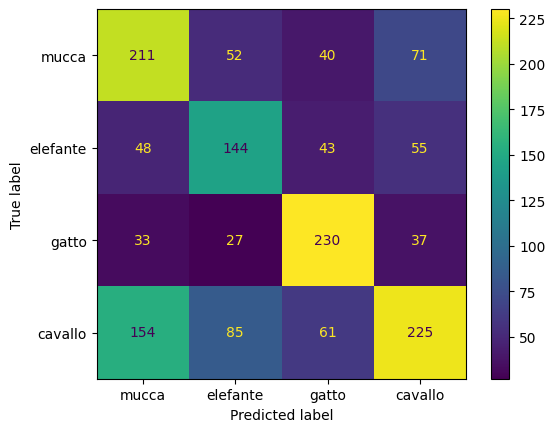

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import LabelEncoder

cm = confusion_matrix(yTest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

How is the accuracy or F1-measure on the test dataset?

Are you satisfied by the performances?

Try to modify the architecture (add layers) and some of the parameters.

### About Dropout

*Study this part only if you have time for it. It concerns the previous network but prefer to study first part II and come back here after.*

Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By â€œignoringâ€, I mean these units are not considered during a particular forward or backward pass.

Why use dropout ? A fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other during training which curbs the individual power of each neuron leading to overfitting of training data.

**Let's add dropout and activation functions to the network!**

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential(name='MLP model with dropout')

model = Sequential()
model.add(Input(shape=xTrain.shape[1:]))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(200,activation='relu'))
# adding dropout to the previous layer
model.add(Dropout(0.2))

model.add(Dense(nbClasses, activation='softmax'))

model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 256)     7168      
                                                                 
 global_average_pooling2d (  (None, 256)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 200)               51400     
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 804       
                                                                 
Total params: 59372 (231.92 KB)
Trainable params: 59372 (231.92 KB)
Non-trainable params: 0 (0.00 Byte)
________________

**[TO DO - Students] Plot the training metrics (loss and accuracy). Test the model on the test data and compare the confusion matrix on the test data and train data**

In [ ]:
history = model.fit(xTrain, np.array(yTrain), epochs=100, shuffle=True,
                    batch_size=32, validation_data=(xVal, np.array(yVal)),
                    callbacks=[EarlyStopping(monitor="val_loss", mode="auto", patience=15)])


Epoch 1/100
20/20 [==============================] - 5s 142ms/step - loss: 1.3946 - accuracy: 0.2359 - val_loss: 1.3857 - val_accuracy: 0.2500
Epoch 2/100
20/20 [==============================] - 3s 135ms/step - loss: 1.3918 - accuracy: 0.2281 - val_loss: 1.3880 - val_accuracy: 0.2500
Epoch 3/100
20/20 [==============================] - 3s 130ms/step - loss: 1.3900 - accuracy: 0.2344 - val_loss: 1.3834 - val_accuracy: 0.2688
Epoch 4/100
20/20 [==============================] - 3s 126ms/step - loss: 1.3870 - accuracy: 0.2391 - val_loss: 1.3830 - val_accuracy: 0.2875
Epoch 5/100
20/20 [==============================] - 3s 126ms/step - loss: 1.3832 - accuracy: 0.2875 - val_loss: 1.3805 - val_accuracy: 0.3250
Epoch 6/100
20/20 [==============================] - 2s 126ms/step - loss: 1.3857 - accuracy: 0.2453 - val_loss: 1.3775 - val_accuracy: 0.3187
Epoch 7/100
20/20 [==============================] - 3s 128ms/step - loss: 1.3835 - accuracy: 0.2719 - val_loss: 1.3759 - val_accuracy: 0.3187

In [ ]:
y_pred = model.predict(xTest)

48/48 [==============================] - 2s 31ms/step


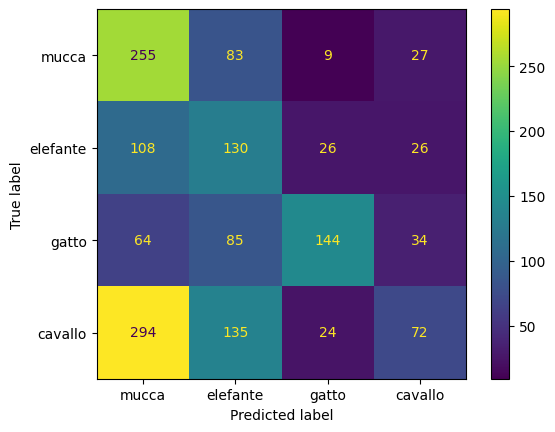

In [ ]:
y_pred = model.predict(xTest)
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming y_pred is the predicted labels (not one-hot encoded)
y_pred_labels = np.argmax(y_pred, axis=1)

# Use LabelEncoder to transform the original class labels to integers
le = LabelEncoder()
le.fit(classes)

# Transform true labels to integers using LabelEncoder
yTest_encoded = le.transform(le.inverse_transform(yTest))

# Calculate confusion matrix
cm = confusion_matrix(yTest_encoded, y_pred_labels)

# Create a ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Plot the confusion matrix
disp.plot()
plt.show()


## Using a pre-learned network

### loading VGG-16 description part and adding layers to build our own classification network

In [ ]:
# Create VGG16 model with pre-trained weights and excluding the top layers (fully connected) layers of the model

VGGmodel = VGG16(weights='imagenet', include_top=False)
#features = VGGmodel.predict(xTrain)
#print(features.shape)
VGGmodel.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

**[TO DO - Students] What is the goal of the include_top=false parameter and adapt the model to our classification model by filling the gaps of the following cell**

the include_top=false, means you are excluding the top (fully connected) layers of the model, The "top" layers typically include the final classification layers that are specific to the ImageNet dataset . This is common if you are using the model for feature extraction and plan to add your own fully connected layers.

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input

# Create VGG16 model with pre-trained weights and excluding the top layers
VGGmodel = VGG16(weights='imagenet', include_top=False)

# Freeze the layers in the VGG model
for layer in VGGmodel.layers:
    layer.trainable = False

# Add custom layers to the VGG model for your specific task
input_layer = Input(shape=(224, 224, 3))  # Specify the input shape
x = VGGmodel(input_layer)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(nbClasses, activation='softmax')(x)

# Create the final model by combining the VGG model and custom layers
model = Model(inputs=input_layer, outputs=predictions)

# Print the summary of the model

#Pre-training: Start with a model that has been trained on a large dataset for a related task. For example, you might use a pre-trained image classification model on a large dataset.

#Transfer Learning: Use the pre-trained model as a starting point for your new task. Remove the final layers (which were specific to the original task) and replace them with new layers suitable for your task.

#Fine-tuning: Train the modified model on your new dataset. However, you might not train all the layers from scratch. Instead, you can freeze some of the layers (those responsible for lower-level features that are likely transferable) and only train the newly added layers or some of the later layers.

Can you display the architecture of this entire network?

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_5 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 40409924 (154.15 MB)
Trainable params: 25695236 (98.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


\**[TO DO - Students] What would happen if we ran model.fit now ? Make it so that the training will only train the new layers and train the model.**

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xTrain, np.array(yTrain), epochs=100, shuffle=True,
                    batch_size=32, validation_data=(xVal, np.array(yVal)),
                    callbacks=[EarlyStopping(monitor="val_loss", mode="auto", patience=15)])

Epoch 1/100
20/20 [==============================] - 10s 226ms/step - loss: 7.5249 - accuracy: 0.4422 - val_loss: 0.7335 - val_accuracy: 0.7063
Epoch 2/100
20/20 [==============================] - 4s 215ms/step - loss: 0.4446 - accuracy: 0.8641 - val_loss: 0.4018 - val_accuracy: 0.8375
Epoch 3/100
20/20 [==============================] - 4s 193ms/step - loss: 0.1295 - accuracy: 0.9578 - val_loss: 0.4559 - val_accuracy: 0.8062
Epoch 4/100
20/20 [==============================] - 5s 238ms/step - loss: 0.0422 - accuracy: 0.9937 - val_loss: 0.4471 - val_accuracy: 0.8500
Epoch 5/100
20/20 [==============================] - 4s 186ms/step - loss: 0.0174 - accuracy: 0.9984 - val_loss: 0.3422 - val_accuracy: 0.8813
Epoch 6/100
20/20 [==============================] - 4s 186ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.3529 - val_accuracy: 0.8625
Epoch 7/100
20/20 [==============================] - 4s 180ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.3613 - val_accuracy: 0.856

Some classes are not predicted because we did not shuffle the data and every samples of some datasets are part of the validation set.

### fine-tune the network

Fine-tune the entire network if you have enough computing ressouces, otherwise, carefully choose the layers you want to fine-tune.

In [ ]:
for i, layer in enumerate(VGGmodel.layers):
   print(i, layer.name)
model.summary()

0 input_4
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_5 (Dense)             (None, 4)   

In this example, we will fine-tune the last convolution block starting at layer number 15 (block5_conv).

In [ ]:
from tensorflow.keras.optimizers import RMSprop
# Freeze the first 11 layers and unfreeze the rest for fine-tuning
for layer in model.layers[:11]:
   layer.trainable = False
#  unfreeze the rest for fine-tuning and the weigt will be updated
for layer in model.layers[11:]:
   layer.trainable = True
#need to recompile the network
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#and train again ...
history = model.fit(xTrain, np.array(yTrain), epochs=100, shuffle=True,
                    batch_size=32, validation_data=(xVal, np.array(yVal)),
                    callbacks=[EarlyStopping(monitor="val_loss", mode="auto", patience=15)])

Epoch 1/100
20/20 [==============================] - 4s 189ms/step - loss: 4.7651e-04 - accuracy: 1.0000 - val_loss: 0.3912 - val_accuracy: 0.8562
Epoch 2/100
20/20 [==============================] - 3s 167ms/step - loss: 4.7651e-04 - accuracy: 1.0000 - val_loss: 0.3912 - val_accuracy: 0.8562
Epoch 3/100
20/20 [==============================] - 4s 200ms/step - loss: 4.7651e-04 - accuracy: 1.0000 - val_loss: 0.3912 - val_accuracy: 0.8562
Epoch 4/100
20/20 [==============================] - 3s 172ms/step - loss: 4.7651e-04 - accuracy: 1.0000 - val_loss: 0.3912 - val_accuracy: 0.8562
Epoch 5/100
20/20 [==============================] - 3s 169ms/step - loss: 4.7651e-04 - accuracy: 1.0000 - val_loss: 0.3912 - val_accuracy: 0.8562
Epoch 6/100
20/20 [==============================] - 3s 169ms/step - loss: 4.7651e-04 - accuracy: 1.0000 - val_loss: 0.3912 - val_accuracy: 0.8562
Epoch 7/100
20/20 [==============================] - 3s 170ms/step - loss: 4.7651e-04 - accuracy: 1.0000 - val_loss: 0

You already know how to evaluate the performances on the test dataset and display the confusion matrix. You can also modify the code that loads the test dataset in order to reduce it's size. Let's do it!

48/48 [==============================] - 8s 162ms/step


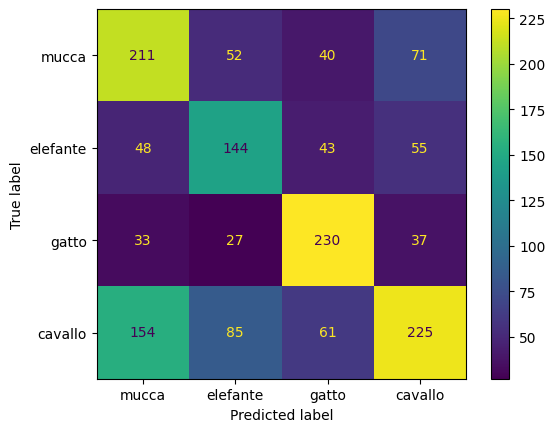

In [ ]:
y_pred = model.predict(xTest)
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import LabelEncoder

cm = confusion_matrix(yTest, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

You are now free to experiments changes in the network:
* add a dense layer
* modify the number of neurons in dense layer(s)
* change the global average polling
* add classes and data
* experiment other optimizers (SGD, Adam, ...)


...

## Visualizing the convolution filters

In this part, we'll visualize the convolution filters and their effect on the input for our previously trained model

**[TO DO - Students] What is the following code plotting ?**
This code visualizes filters from a convolutional layer in a neural network

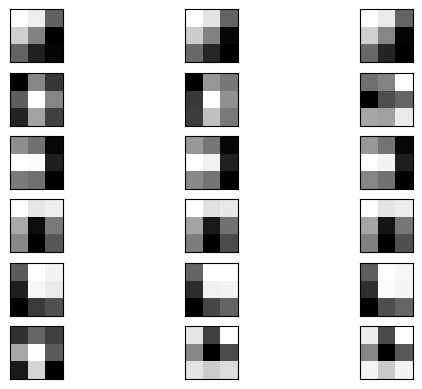

In [ ]:
import matplotlib.pyplot as plt
layer_id = 1
# retrieve weights from the second hidden layer
weights = model.layers[layer_id].get_weights()

# extract filters and biases
filters = weights[0]
biases = weights[1]
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

**[TO DO - Students] Now, let's visualize the feature maps of various depths. Fill the gaps to do so.**

1/1 [==============================] - 0s 76ms/step


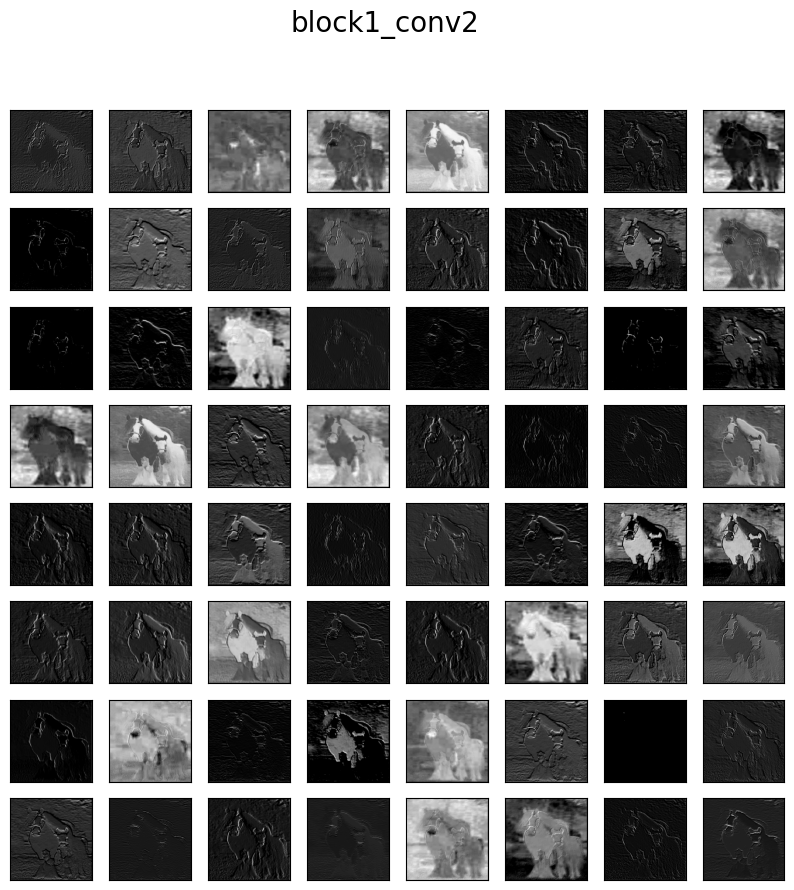

1/1 [==============================] - 0s 111ms/step


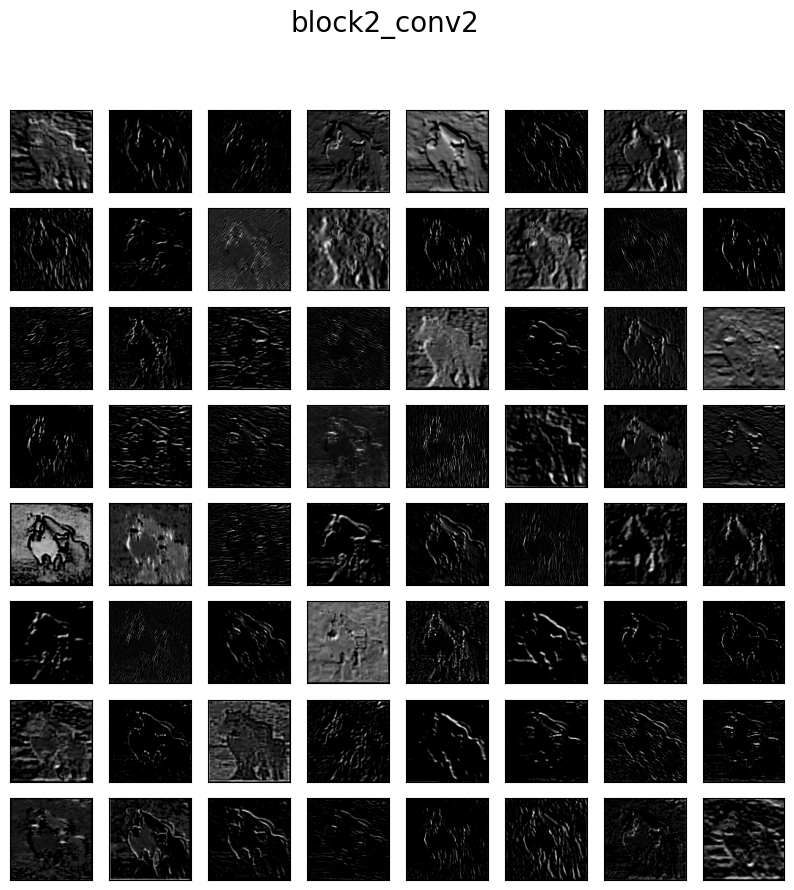

1/1 [==============================] - 0s 119ms/step


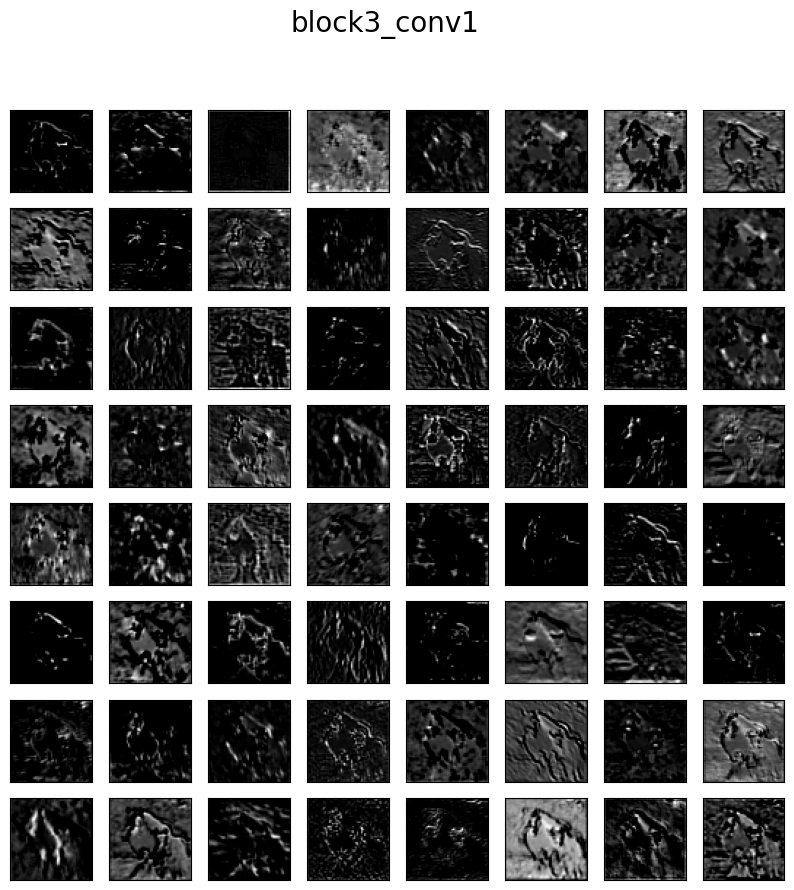

1/1 [==============================] - 0s 150ms/step


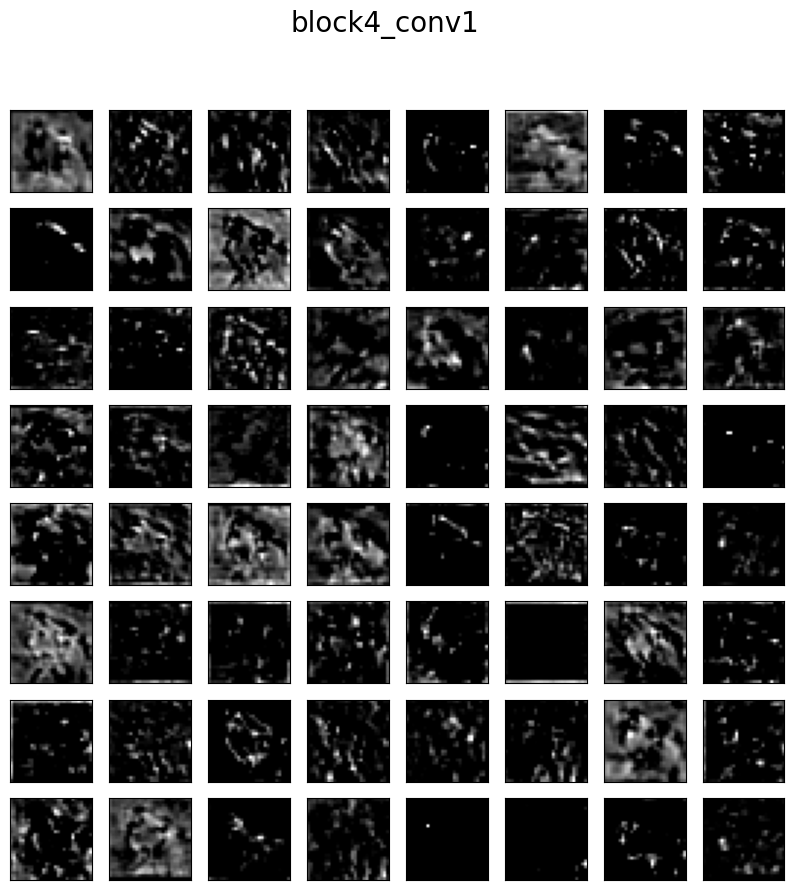

1/1 [==============================] - 0s 222ms/step


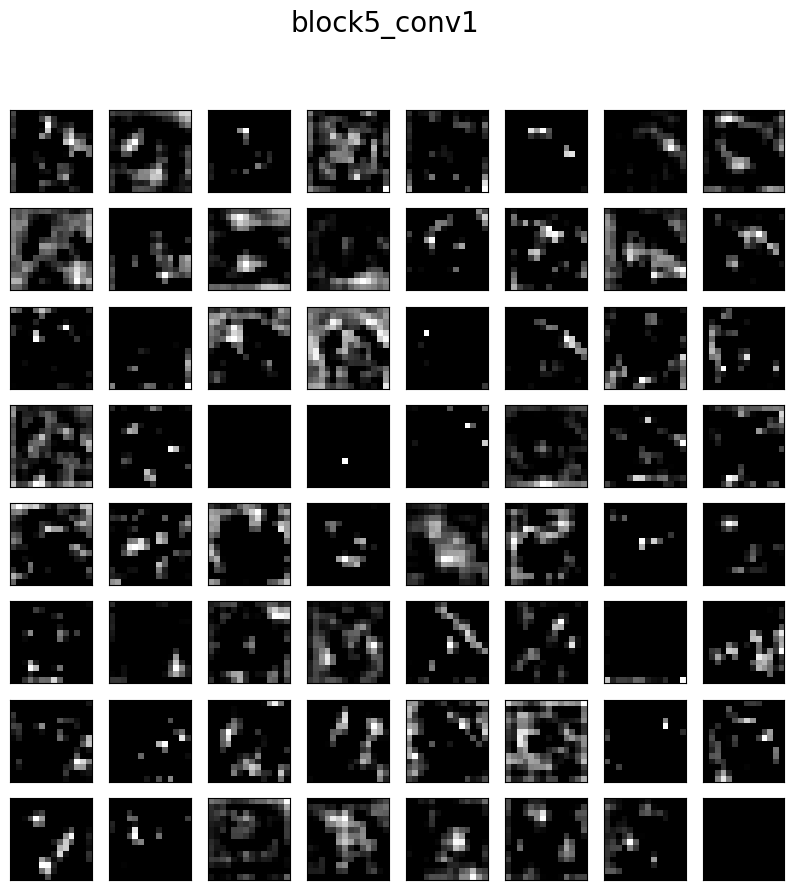

In [ ]:
img_shape = (224, 224, 3)  #input shape of the image
# To reshape the image  Reshapes the selected image to match the input shape and adds an additional dimension for the batch size
img = xTrain[img_index].reshape((1,) + img_shape)
# Load a pre-trained model (VGG16 is used here as an example) with the fully connected layers included
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=True)
# Create a new model that outputs the activation maps of a specific convolutional layer in our case is block5-conv3
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)
#Visualize Feature Maps for Selected Layers by itterating throug convolutionnal layers:
for layer in ['block1_conv2', 'block2_conv2', 'block3_conv1', 'block4_conv1', 'block5_conv1']:# Iterates through selected convolutional layers.
    model_fm = Model(inputs=model.inputs, outputs=model.get_layer(layer).output)
    feature_maps = model_fm.predict(img)

    # Plotting the feature maps
    square = 8
    ix = 1
    fig, axs = plt.subplots(square, square, figsize=(10, 10))
    for i in range(square):
        for j in range(square):
            ax = axs[i, j]
            ax.set_xticks([])
            ax.set_yticks([])
            ax.imshow(feature_maps[0, :, :, ix - 1], cmap='gray')
            ix += 1
    fig.suptitle(layer, fontsize=20)
    plt.show()


## Activation maximization

Another solution to interpret the inner mecanisms of the network is to use Activation Maximization. This method computes the optimal output which gives the maximum value of a particular activation. Used on the classification layers, this can give us an idea of the patterns recognized to classify a particular class.

To do that we'll use the tf_keras_vis module.

Activation maximization is a technique used to visualize what a neural network is looking for in its input. It aims to find input patterns that maximize the activation of specific neurons or channels in the network

In [ ]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
! pip install tf_keras_vis
from tf_keras_vis.activation_maximization import ActivationMaximization
#used in deep learning and neural network research to visualize
# and understand what specific neurons or filters in a neural network are responding to.
#The idea is to generate input data (images, sequences, etc.) that maximally activates the chosen neuron.
#Visualization of these generated inputs can provide insights
#into what patterns or features the network has learned to recognize.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 953.6 kB/s eta 0:00:00


In [ ]:
# Define a custom loss function that extracts specific elements from the output
def loss(output):
    return (output[0][0], output[1][1], output[2][2])

# Define a function to modify the model by changing the activation of the last layer to linear
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

#he model_modifier function modifies the model by setting the activation function of the last layer to be linear.
visualize_activation = ActivationMaximization(model, model_modifier)

In [ ]:
seed_input = tf.random.uniform((3, 224, 224, 3), 0, 255) #3 instances
#The activation maximization process adjusts (512 steps) the seed input to maximize
#the specified loss function, attempting to generate images that activate specific neurons in the mode
activations = visualize_activation(loss, seed_input=seed_input, steps=512)
#The steps=512 parameter is specifying the number of optimization steps
#or iterations for the activation maximization process.

# Convert activations to NumPy arrays
images = [activation.numpy().astype(np.float32) for activation in activations]

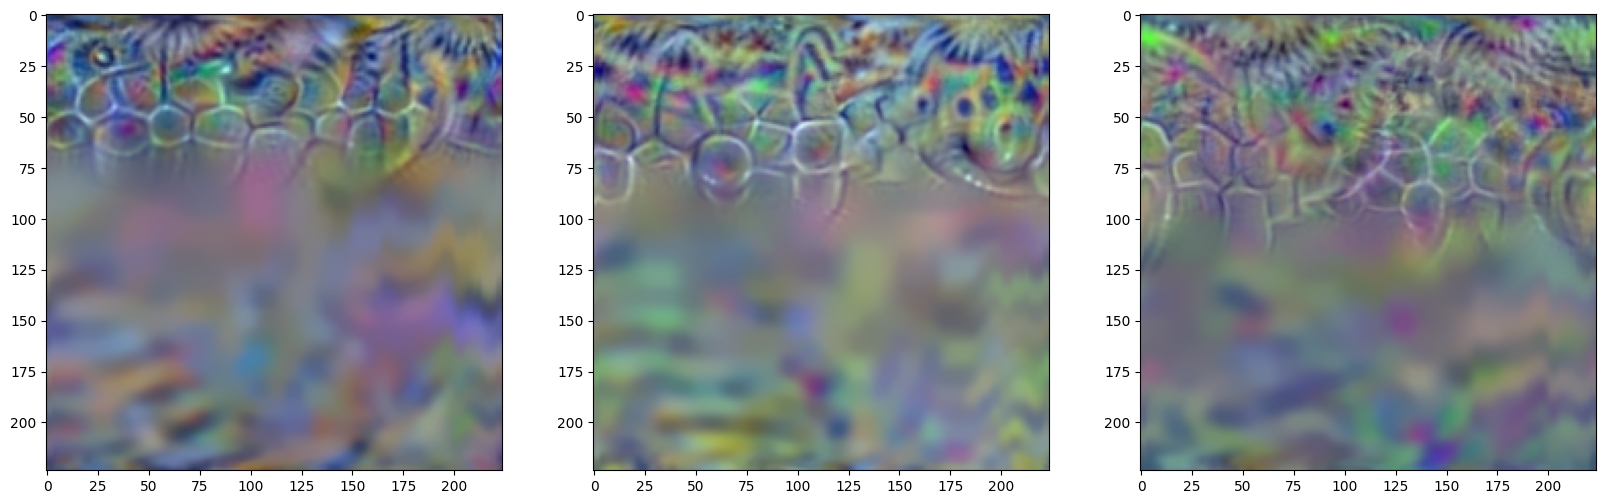

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 20))
for i in range(0, len(images)):
  ax = axs[i]
  visualization = images[i].reshape(224,224,3)
  visualization = (visualization - visualization.min())/(visualization.max()-visualization.min())
  visualization = visualization[:,:,[2,1,0]]
  ax.imshow(visualization)
